In [0]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras import models
from keras import layers
from keras import optimizers
from keras import metrics
from keras import losses
import keras
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


# One Timestamp Ahead

In [0]:
#Import the dataset
df = pd.read_csv('USD_INR.csv')

In [0]:
#cherck top few rows of dataset
df.head()

,Date,Price,Open,High,Low,Change %
0,17-Apr-19,69.445,69.895,69.895,69.331,-0.64%
1,16-Apr-19,69.895,69.820,69.895,69.396,0.72%
2,15-Apr-19,69.395,69.174,69.483,69.045,0.32%
3,14-Apr-19,69.171,69.171,69.171,69.171,-0.03%
4,12-Apr-19,69.190,69.030,69.390,69.030,0.25%


In [0]:
#shape of the dataset
df.shape

(10183, 6)

In [0]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10183 entries, 0 to 10182
Data columns (total 6 columns):
Date        10183 non-null object
Price       10183 non-null float64
Open        10183 non-null float64
High        10183 non-null float64
Low         10183 non-null float64
Change %    10183 non-null object
dtypes: float64(4), object(2)
memory usage: 477.4+ KB


In [0]:
#converting Date column to time
df['Date'] = pd.to_datetime(df['Date'])

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10183 entries, 0 to 10182
Data columns (total 6 columns):
Date        10183 non-null datetime64[ns]
Price       10183 non-null float64
Open        10183 non-null float64
High        10183 non-null float64
Low         10183 non-null float64
Change %    10183 non-null object
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 477.4+ KB


In [0]:
df_date = df.set_index(["Date"], drop=True)
df_date.head(5)

,Price,Open,High,Low,Change %
Date,,,,,
2019-04-17,69.445,69.895,69.895,69.331,-0.64%
2019-04-16,69.895,69.820,69.895,69.396,0.72%
2019-04-15,69.395,69.174,69.483,69.045,0.32%
2019-04-14,69.171,69.171,69.171,69.171,-0.03%
2019-04-12,69.190,69.030,69.390,69.030,0.25%


In [0]:
#Flipping the dataframe
df_date = df_date.sort_index(axis=1, ascending=True)
df_date = df_date.iloc[::-1]

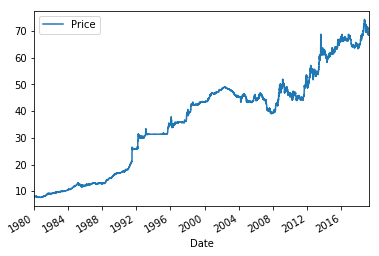

In [0]:
data = df_date[['Price']]
data.plot(y='Price')

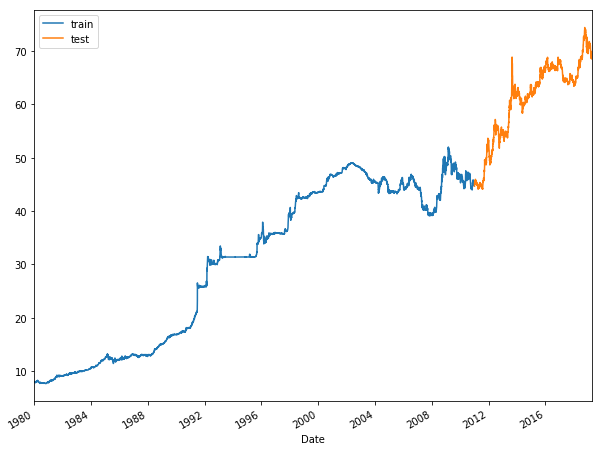

In [0]:
#splitting data into training and testing set based on timestamp
split = pd.Timestamp('01-01-2011')
train = data.loc[:split]
test = data.loc[split:]
ax = train.plot(figsize=(10,8))
test.plot(ax=ax)
plt.legend(['train', 'test'])
plt.show()

In [0]:
#Normalizing the training and test datsets
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

In [0]:
trainset = minmax.fit_transform(train)
testset = minmax.transform(test)

In [0]:
traindf = pd.DataFrame(trainset, columns=['Y'], index=train.index)
testdf = pd.DataFrame(testset, columns=['Y'], index=test.index)

for s in range(1,2):
    traindf['X-{}'.format(s)] = traindf['Y'].shift(s)
    testdf['X-{}'.format(s)] = testdf['Y'].shift(s)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


In [ ]:
X_train = traindf.dropna().drop('Y', axis=1)
y_train = traindf.dropna().drop('X-1', axis=1)
X_test = testdf.dropna().drop('Y', axis=1)
y_test = testdf.dropna().drop('X-1', axis=1)
X_train = X_train.as_matrix()
y_train = y_train.as_matrix()
X_test = X_test.as_matrix()
y_test = y_test.as_matrix()

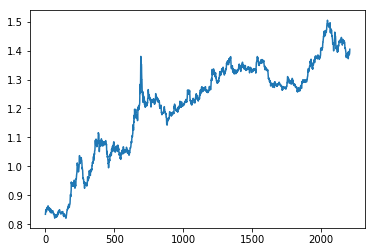

In [0]:
plt.plot(X_test)

## SVM

In [0]:
from sklearn import svm

In [0]:
model = svm.SVR(kernel='rbf')
model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
pred = model.predict(X_test)

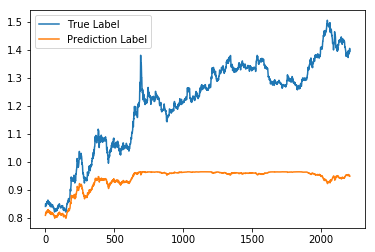

In [0]:
plt.plot(y_test,label='True Label')
plt.plot(pred,label='Prediction Label')
plt.legend()
plt.show()

In [0]:
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print('MSE: %f' % mse)
print('\r2: %f' % r2)

MSE: 0.090761
2: -2.184425


In [0]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

In [0]:
model = RandomForestRegressor(n_estimators=50)
model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [0]:
pred = model.predict(X_test)

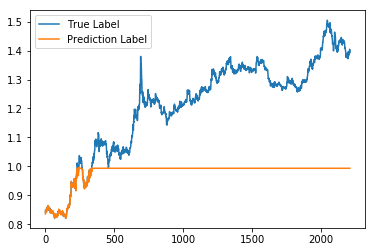

In [0]:
plt.plot(y_test,label='True Label')
plt.plot(pred,label='Prediction Label')
plt.legend()
plt.show()

In [0]:
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print('MSE: %f' % mse)
print('\r2: %f' % r2)

MSE: 0.071953
2: -1.524538


## ANN with Single neuron

In [0]:
import keras.backend as k

In [0]:
k.clear_session()
model = models.Sequential()
model.add(layers.Dense(units=1,activation='tanh',input_shape=(X_test.shape[1],)))
model.compile(optimizer=optimizers.Adam(lr=0.001),loss=losses.mean_squared_error,
              metrics=[metrics.MAE])

In [0]:
model.fit(X_train,y_train,batch_size=32, epochs=20, verbose=1)

Epoch 1/20
7972/7972 [==============================] - 1s 76us/step - loss: 0.4336 - mean_absolute_error: 0.5383
Epoch 2/20
7972/7972 [==============================] - 1s 64us/step - loss: 0.1779 - mean_absolute_error: 0.3693
Epoch 3/20
7972/7972 [==============================] - 1s 64us/step - loss: 0.1023 - mean_absolute_error: 0.2960
Epoch 4/20
7972/7972 [==============================] - 1s 64us/step - loss: 0.0792 - mean_absolute_error: 0.2591
Epoch 5/20
7972/7972 [==============================] - 0s 62us/step - loss: 0.0681 - mean_absolute_error: 0.2363
Epoch 6/20
7972/7972 [==============================] - 1s 63us/step - loss: 0.0590 - mean_absolute_error: 0.2186
Epoch 7/20
7972/7972 [==============================] - 0s 61us/step - loss: 0.0503 - mean_absolute_error: 0.2017
Epoch 8/20
7972/7972 [==============================] - 0s 61us/step - loss: 0.0419 - mean_absolute_error: 0.1843
Epoch 9/20
7972/7972 [==============================] - 0s 62us/step - loss: 0.0340 - me

No handles with labels found to put in legend.


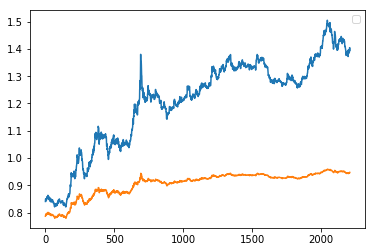

In [0]:
y_pred = model.predict(X_test)
plt.plot(y_test)
plt.plot(y_pred)
plt.legend()

In [0]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: %f' % mse)
print('\r2: %f' % r2)

MSE: 0.071953
2: -1.524538


## Multiple hidden layers

In [0]:
from keras.layers import Dropout

In [0]:
k.clear_session()
model = models.Sequential()
model.add(layers.Dense(units=64,activation='relu',input_shape=(X_train.shape[1],)))
model.add(layers.Dense(units=64,activation='relu'))
model.add(layers.Dense(units=1))
model.compile(optimizer=optimizers.Adam(lr=0.001),loss=losses.mean_squared_error,
              metrics=[metrics.MAE])
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
7972/7972 [==============================] - 1s 185us/step - loss: 0.0017 - mean_absolute_error: 0.0105
Epoch 2/20
7972/7972 [==============================] - 1s 163us/step - loss: 1.0618e-05 - mean_absolute_error: 0.0019
Epoch 3/20
7972/7972 [==============================] - 1s 161us/step - loss: 1.0834e-05 - mean_absolute_error: 0.0019
Epoch 4/20
7972/7972 [==============================] - 1s 162us/step - loss: 1.1746e-05 - mean_absolute_error: 0.0021
Epoch 5/20
7972/7972 [==============================] - 1s 160us/step - loss: 1.2931e-05 - mean_absolute_error: 0.0023
Epoch 6/20
7972/7972 [==============================] - 1s 162us/step - loss: 1.0971e-05 - mean_absolute_error: 0.0020
Epoch 7/20
7972/7972 [==============================] - 1s 161us/step - loss: 1.4695e-05 - mean_absolute_error: 0.0024
Epoch 8/20
7972/7972 [==============================] - 1s 160us/step - loss: 1.5479e-05 - mean_absolute_error: 0.0026
Epoch 9/20
7972/7972 [==============================

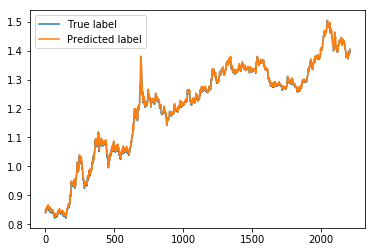

In [0]:
y_pred = model.predict(X_test)
plt.plot(y_test,label='True label')
plt.plot(y_pred,label ='Predicted label')
plt.legend()

In [0]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: %f' % mse)
print('\r2: %f' % r2)

MSE: 0.071953
2: -1.524538


In [0]:
#With dropout
k.clear_session()
model = models.Sequential()
model.add(layers.Dense(units=64,activation='relu',input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(units=64,activation='relu'))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(units=1))
model.compile(optimizer=optimizers.Adam(lr=0.001),loss=losses.mean_squared_error,
              metrics=[metrics.MAE])
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
7972/7972 [==============================] - 2s 219us/step - loss: 0.0169 - mean_absolute_error: 0.0810
Epoch 2/20
7972/7972 [==============================] - 1s 177us/step - loss: 0.0053 - mean_absolute_error: 0.0523
Epoch 3/20
7972/7972 [==============================] - 1s 179us/step - loss: 0.0046 - mean_absolute_error: 0.0493
Epoch 4/20
7972/7972 [==============================] - 1s 177us/step - loss: 0.0042 - mean_absolute_error: 0.0478
Epoch 5/20
7972/7972 [==============================] - 1s 179us/step - loss: 0.0038 - mean_absolute_error: 0.0458
Epoch 6/20
7972/7972 [==============================] - 1s 178us/step - loss: 0.0035 - mean_absolute_error: 0.0443
Epoch 7/20
7972/7972 [==============================] - 1s 178us/step - loss: 0.0034 - mean_absolute_error: 0.0443
Epoch 8/20
7972/7972 [==============================] - 1s 181us/step - loss: 0.0034 - mean_absolute_error: 0.0441
Epoch 9/20
7972/7972 [==============================] - 1s 178us/step - loss: 0.

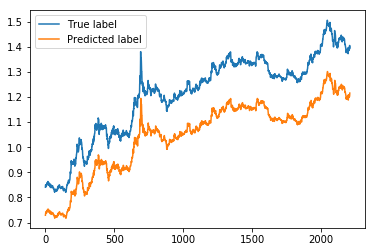

In [0]:
y_pred = model.predict(X_test)
plt.plot(y_test,label='True label')
plt.plot(y_pred,label ='Predicted label')
plt.legend()
plt.show()

In [0]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: %f' % mse)
print('\r2: %f' % r2)

MSE: 0.071953
2: -1.524538


# 60 Timesteps Ahead

## LSTM

In [0]:
df.head()

,Date,Price,Open,High,Low,Change %
0,2019-04-17,69.445,69.895,69.895,69.331,-0.64%
1,2019-04-16,69.895,69.820,69.895,69.396,0.72%
2,2019-04-15,69.395,69.174,69.483,69.045,0.32%
3,2019-04-14,69.171,69.171,69.171,69.171,-0.03%
4,2019-04-12,69.190,69.030,69.390,69.030,0.25%


In [0]:
test = df.iloc[:400,1:2]
train = df.iloc[401:,1:2]

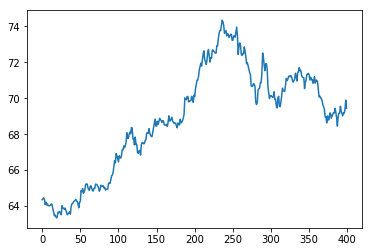

In [0]:
plt.plot(np.flip(test.values))

In [0]:
training = train.values
training = np.flip(training)

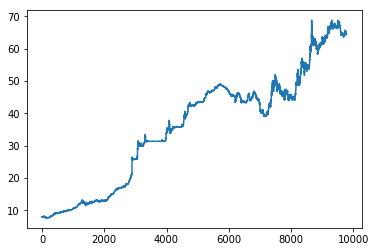

In [0]:
plt.plot(training)

In [0]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
train_scaled = sc.fit_transform(training)


In [0]:
train.shape[0]

10106

In [0]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, train.shape[0]):
    X_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [0]:
lstm = Sequential()
# Layer 1: LSTM layer with Dropout regularisation
lstm.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
lstm.add(Dropout(0.2))
# Layer 2: LSTM layer with Dropout regularisation
lstm.add(LSTM(units = 50, return_sequences = True))
lstm.add(Dropout(0.2))
# Layer 3: LSTM layer with Dropout regularisation
lstm.add(LSTM(units = 50, return_sequences = True))
lstm.add(Dropout(0.2))
# Layer 4: LSTM layer with Dropout regularisation
lstm.add(LSTM(units = 50))
lstm.add(Dropout(0.2))
# output layer
lstm.add(Dense(units = 1))
# Compiling the RNN
lstm.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the model
lstm.fit(X_train, y_train, epochs = 50, batch_size = 32)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
9722/9722 [==============================] - 105s 11ms/step - loss: 0.0091
Epoch 2/50
9722/9722 [==============================] - 100s 10ms/step - loss: 0.0023
Epoch 3/50
9722/9722 [==============================] - 100s 10ms/step - loss: 0.0019
Epoch 4/50
9722/9722 [==============================] - 99s 10ms/step - loss: 0.0018
Epoch 5/50
9722/9722 [==============================] - 101s 10ms/step - loss: 0.0017
Epoch 6/50
9722/9722 [==============================] - 100s 10ms/step - loss: 0.0014
Epoch 7/50
9722/9722 [==============================] - 99s 10ms/step - loss: 0.0014
Epoch 8/50
9722/9722 [==============================] - 99s 10ms/step - loss: 0.0013
Epoch 9/50
9722/9722 [==============================] - 101s 10ms/step - loss: 0

In [0]:
#saving the model
from keras.models import load_model
lstm.save('LSTM.h5')
#loading the model
lstm = load_model('LSTM.h5')

In [0]:
y_true = test.values
y_true = np.flip(y_true)

In [0]:
# Getting the predicted stock price 
dataset_total = pd.concat((df.iloc[401:]['Open'], df.iloc[:400]['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 460):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_test = lstm.predict(X_test)
y_test = sc.inverse_transform(y_test)

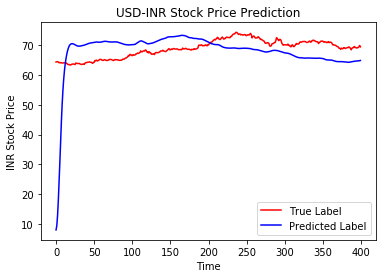

In [0]:
# Visualising the results
plt.plot(y_true, color = 'red', label = 'True Label')
plt.plot(y_test, color = 'blue', label = 'Predicted Label')
plt.title('USD-INR Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('INR Stock Price')
plt.legend()
plt.show()

In [0]:
mse = mean_squared_error(y_true, y_test)
r2 = r2_score(y_true, y_test)
print('MSE: %f' % mse)
print('\nr2: %f' % r2)

MSE: 58.057675
2: -5.609884


## DNN single layer

In [0]:
# Creating a data structure with 60 timesteps and 1 output
test = df.iloc[:400,1:2]
train = df.iloc[401:,1:2]
training_set = train.values
training_set = np.flip(training_set)
real_stock_price = test.values
real_stock_price = np.flip(real_stock_price)
X_train = []
y_train = []
for i in range(60, train.shape[0]):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
#k.clear_session()
model = models.Sequential()
model.add(layers.Dense(units=1,activation='tanh',input_shape = (X_train.shape[1],)))
model.compile(optimizer=optimizers.Adam(lr=0.001),loss=losses.mean_squared_error,
              metrics=[metrics.MAE])
model.fit(X_train,y_train,batch_size=32, epochs=20, verbose=1)

Epoch 1/20
9722/9722 [==============================] - 2s 178us/step - loss: 0.0026 - mean_absolute_error: 0.0368
Epoch 2/20
9722/9722 [==============================] - 1s 72us/step - loss: 0.0024 - mean_absolute_error: 0.0363
Epoch 3/20
9722/9722 [==============================] - 1s 73us/step - loss: 0.0024 - mean_absolute_error: 0.0360
Epoch 4/20
9722/9722 [==============================] - 1s 64us/step - loss: 0.0024 - mean_absolute_error: 0.0356
Epoch 5/20
9722/9722 [==============================] - 1s 63us/step - loss: 0.0023 - mean_absolute_error: 0.0355
Epoch 6/20
9722/9722 [==============================] - 1s 63us/step - loss: 0.0023 - mean_absolute_error: 0.0351
Epoch 7/20
9722/9722 [==============================] - 1s 64us/step - loss: 0.0023 - mean_absolute_error: 0.0350
Epoch 8/20
9722/9722 [==============================] - 1s 62us/step - loss: 0.0023 - mean_absolute_error: 0.0349
Epoch 9/20
9722/9722 [==============================] - 1s 65us/step - loss: 0.0022 - m

In [0]:
model.save('single.h5')
#loading the model
single = load_model('single.h5')

In [0]:
y_true = test.values
y_true = np.flip(real_stock_price)
# Getting the predicted stock price 
dataset = pd.concat((df.iloc[401:]['Open'], df.iloc[:400]['Open']), axis = 0)
inputs = dataset[len(dataset) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 460):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
y_test = single.predict(X_test)
y_test = sc.inverse_transform(y_test)

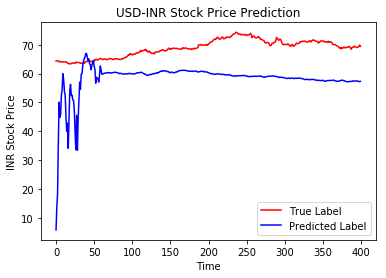

In [0]:
# Visualising the results
plt.plot(y_true, color = 'red', label = 'True Label')
plt.plot(y_test, color = 'blue', label = 'Predicted Label')
plt.title('USD-INR Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('INR Stock Price')
plt.legend()
plt.show()

In [0]:
mse = mean_squared_error(y_true, y_test)
r2 = r2_score(y_true, y_test)
print('MSE: %f' % mse)
print('\r2: %f' % r2)

MSE: 143.741302
2: -15.364991


## DNN Multi Layer

In [0]:
#k.clear_session()
model = models.Sequential()
model.add(layers.Dense(units=64,activation='relu',input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(units=64,activation='relu'))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(units=1))
model.compile(optimizer=optimizers.Adam(lr=0.001),loss=losses.mean_squared_error,
              metrics=[metrics.MAE])
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
9722/9722 [==============================] - 3s 300us/step - loss: 0.0185 - mean_absolute_error: 0.0782
Epoch 2/20
9722/9722 [==============================] - 2s 182us/step - loss: 0.0051 - mean_absolute_error: 0.0490
Epoch 3/20
9722/9722 [==============================] - 2s 201us/step - loss: 0.0042 - mean_absolute_error: 0.0444
Epoch 4/20
9722/9722 [==============================] - 2s 211us/step - loss: 0.0037 - mean_absolute_error: 0.0427
Epoch 5/20
9722/9722 [==============================] - 2s 209us/step - loss: 0.0031 - mean_absolute_error: 0.0395
Epoch 6/20
9722/9722 [==============================] - 2s 208us/step - loss: 0.0027 - mean_absolute_error: 0.0375
Epoch 7/20
9722/9722 [==============================] - 2s 208us/step - loss: 0.0025 - mean_absolute_error: 0.0362
Epoch 8/20
9722/9722 [==============================] - 2s 220us/step - loss: 0.0021 - mean_absolute_error: 0.0340
Epoch 9/20
9722/9722 [==============================] - 2s 220us/step - loss: 0.

In [0]:
model.save('dnn_60.h5')
#loading the model
dnn = load_model('dnn_60.h5')

In [0]:
# Getting the predicted stock price 
dataset = pd.concat((df.iloc[401:]['Open'], df.iloc[:400]['Open']), axis = 0)
inputs = dataset[len(dataset) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 460):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
y_test = dnn.predict(X_test)
y_test = sc.inverse_transform(y_test)


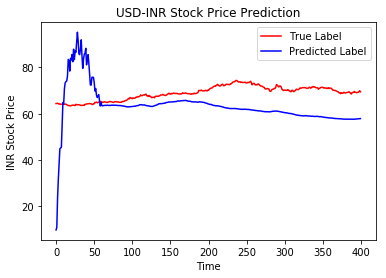

In [0]:
# Visualising the results
plt.plot(y_true, color = 'red', label = 'True Label')
plt.plot(y_test, color = 'blue', label = 'Predicted Label')
plt.title('USD-INR Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('INR Stock Price')
plt.legend()
plt.show()

In [0]:
mse = mean_squared_error(y_true, y_test)
r2 = r2_score(y_true, y_test)
print('MSE: %f' % mse)
print('\r2: %f' % r2)

MSE: 128.233756
2: -13.599452


## SVM

In [0]:
# Creating a data structure with 60 timesteps and 1 output
test = df.iloc[:400,1:2]
train = df.iloc[401:,1:2]
training_set = train.values
training_set = np.flip(training_set)
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
y_true = test.values
y_true = np.flip(y_true)
X_train = []
y_train = []
for i in range(60, train.shape[0]):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
model = svm.SVR(kernel='rbf')
model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
# Getting the predicted stock price 
dataset = pd.concat((df.iloc[401:]['Open'], df.iloc[:400]['Open']), axis = 0)
inputs = dataset[len(dataset) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 460):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
y_test = model.predict(X_test)

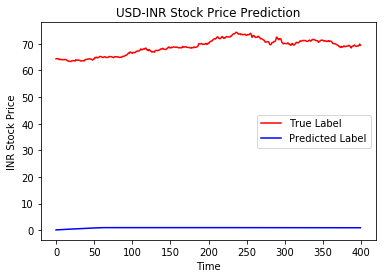

In [0]:
# Visualising the results
plt.plot(y_true, color = 'red', label = 'True Label')
plt.plot(y_test, color = 'blue', label = 'Predicted Label')
plt.title('USD-INR Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('INR Stock Price')
plt.legend()
plt.show()

In [0]:
mse = mean_squared_error(y_true, y_test)
r2 = r2_score(y_true, y_test)
print('MSE: %f' % mse)
print('\n r2: %f' % r2)

MSE: 4624.197382
2: -525.466266
